<a href="https://colab.research.google.com/github/alan7s/cadeia_de_markov_previsao_tempo/blob/main/Previsao-Tempo-Cadeia-Markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@markdown <center><h2>Baixar dados</h2></center><br>
#@markdown <center>Necessário rodar essa célula uma primeira vez para o código abaixo funcionar</center>
!wget -q https://raw.githubusercontent.com/alan7s/cadeia_de_markov_previsao_tempo/main/data/bh_cercadinho_2020.csv #BAIXA DADOS 2020
!wget -q https://raw.githubusercontent.com/alan7s/cadeia_de_markov_previsao_tempo/main/data/bh_pampulha_2021.csv #BAIXA DADOS 2021
!wget -q https://raw.githubusercontent.com/alan7s/cadeia_de_markov_previsao_tempo/main/data/manaus_2021.csv #BAIXA DADOS 2021 estação Manaus

,Cidade,Dia,Mes,Ano,Preciptacao,Ocorrencia chuva
0,Belo Horizonte,01,1,2021,21.0,1.0
1,Belo Horizonte,02,1,2021,6.0,1.0
2,Belo Horizonte,03,1,2021,29.0,1.0
3,Belo Horizonte,04,1,2021,31.0,1.0
4,Belo Horizonte,05,1,2021,1.0,1.0
...,...,...,...,...,...,...
360,Belo Horizonte,27,12,2021,0.0,0.0
361,Belo Horizonte,28,12,2021,4.0,1.0
362,Belo Horizonte,29,12,2021,5.0,1.0
363,Belo Horizonte,30,12,2021,15.0,1.0


Verão:
 Probabilidade de chuva seguido de chuva no verão: 0.24444444444444444
 Probabilidade de chuva seguido de sol no verão: 0.7555555555555555
 Probabilidade de sol seguido de chuva no verão: 0.13333333333333333
 Probabilidade de sol seguido de sol no verão: 0.8666666666666667

Matriz probabilidade no verão: 
[[0.24444444 0.75555556]
 [0.13333333 0.86666667]]

Outono:
 Probabilidade de chuva seguido de chuva no outono: 0.01098901098901099
 Probabilidade de chuva seguido de sol no outono: 0.989010989010989
 Probabilidade de sol seguido de chuva no outono: 0.06593406593406594
 Probabilidade de sol seguido de sol no outono: 0.9340659340659341

Matriz probabilidade no outono: 
[[0.01098901 0.98901099]
 [0.06593407 0.93406593]]

Inverno:
 Probabilidade de chuva seguido de chuva no inverno: 0.0
 Probabilidade de chuva seguido de sol no inverno: 1.0
 Probabilidade de sol seguido de chuva no inverno: 0.043478260869565216
 Probabilidade de sol seguido de sol no inverno: 0.9565217391304348

M

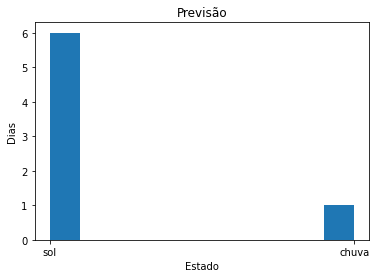


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Teste Efiencia Markov:

As estações e os estados do dia atual são gerados de forma aletaória.
São realizados 1000 testes para cada estação e estado do dia atual de forma aleatória:

Cálculo Acerto para previsão de 3 dias:
Média de acerto Markov : 91.9%

Cálculo Acerto para previsão de 4 dias:
Média de acerto Markov : 85.7%

Cálculo Acerto para previsão de 7 dias:
Média de acerto Markov : 61.8%

Cálculo Acerto para previsão de 10 dias:
Média de acerto Markov : 42.5%


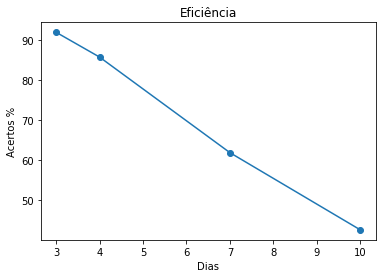

In [ ]:
#@markdown <center><h3><h2>Previsão do tempo</h2>Cadeia de Markov como modelo de previsão do tempo </h3></center><br>
import numpy as np
import random as rm
import time
import pandas as pd
from numpy import linalg as LA
import random as rm
import datetime
import matplotlib.pyplot as plt


#@markdown ---
#@markdown ####Selecione a base de dados
#@markdown Estação:
estacao_meteorologica = "bh_pampulha_2021.csv" #@param ["bh_cercadinho_2020.csv", "bh_pampulha_2021.csv", "manaus_2021.csv"] {type:"string"}
#@markdown ---

#@markdown ####Configurar previsão
estacao_do_ano = "verao" #@param ["verao", "outono", "inverno", "primavera", "aleatorio"] {type:"string"}
clima_hoje = "chuva" #@param ["chuva", "sol", "aleatorio"] {type:"string"}
previsao_dias = 7
#@markdown ---

data = pd.read_csv(estacao_meteorologica)

dia = []
mes = []
ano = []
for j ,i in enumerate(data['PRECIPITACAO TOTAL']):
  if np.isnan(i):
    data.at[j,'PRECIPITACAO TOTAL'] = 0.0
data=data.groupby(['Data']).sum().reset_index() # .reset_index() REFAZ A TABELA COM A SOMA
for i in data['Data'] :
  d = datetime.datetime.strptime(i, "%Y/%m/%d")
  aux = d.strftime('%m')
  while aux[0] == "0":
    aux = aux[1:]
  dia.append(d.strftime('%d'))
  mes.append(aux)
  ano.append(d.strftime('%Y'))
if (estacao_meteorologica == "manaus_2021.csv"):
  d = {'Cidade':'Manaus','Dia':dia,'Mes':mes,'Ano':ano,'Preciptacao':data['PRECIPITACAO TOTAL']}  
else:
  d = {'Cidade':'Belo Horizonte','Dia':dia,'Mes':mes,'Ano':ano,'Preciptacao':data['PRECIPITACAO TOTAL']}
df = pd.DataFrame(data=d)

new_value=[]
for value in df['Preciptacao']:#valores binarios quando obtiver preciptação ou não
    if value!=0:
        value=1
    new_value.append(value)

df['Ocorrencia chuva']=new_value
display(df)
print('Verão:')
#probabilidade de chover seguido de chuva no verão
Bh_verao_data = df.loc[(df['Mes']==str(1))| (df['Mes']==str(2)) | (df['Mes']==str(3))]
Bh_verao_data2 = Bh_verao_data.copy()
Bh_verao_total_dias = Bh_verao_data['Ocorrencia chuva'].count()
preciptacao_coluna=Bh_verao_data['Ocorrencia chuva']
dias_chuvas=0
dia_anterior=1
for dia_atual in preciptacao_coluna:
    if dia_atual ==1:
        if dia_anterior==1:
          dias_chuvas+=1
        dia_anterior=dia_atual
    elif dia_atual == 0:
        dia_anterior=dia_atual
        
Bh_chuva_seguida_chuva_prob_verao = float(dias_chuvas)/float(Bh_verao_total_dias)
print(f' Probabilidade de chuva seguido de chuva no verão: {Bh_chuva_seguida_chuva_prob_verao}') 

#probabilidade de chover seguido de ensoralado no verão
Bh_chuva_seguida_sol_prob_verao=1-Bh_chuva_seguida_chuva_prob_verao
print(f' Probabilidade de chuva seguido de sol no verão: {Bh_chuva_seguida_sol_prob_verao}') 

dias_chuvas=0
dia_anterior=1
cont_index=0
for dia_atual in preciptacao_coluna:
    if dia_atual ==1:
        if dia_anterior==1:
          Bh_verao_data2.at[cont_index,'Ocorrencia chuva']=Bh_chuva_seguida_chuva_prob_verao
        dia_anterior=dia_atual
    elif dia_atual == 0:
        if dia_anterior == 1:
          Bh_verao_data2.at[cont_index,'Ocorrencia chuva']=Bh_chuva_seguida_sol_prob_verao
        dia_anterior=dia_atual
    cont_index+=1

#probabilidade de sol seguido de chuva no verão
preciptacao_coluna=Bh_verao_data['Ocorrencia chuva']
dias_sol_chuva=0
dia_anterior=1
for dia_atual in preciptacao_coluna:
    if dia_atual ==1 and dia_anterior==0:
        dias_sol_chuva+=1
        dia_anterior=dia_atual
    elif dia_atual == 0:
        dia_anterior = dia_atual

Bh_sol_seguida_chuva_prob_verao = float(dias_sol_chuva)/float(Bh_verao_total_dias)

print(f' Probabilidade de sol seguido de chuva no verão: {Bh_sol_seguida_chuva_prob_verao}')

#probabilidade de sol seguido de sol
Bh_sol_seguida_sol_prob_verao=1-Bh_sol_seguida_chuva_prob_verao
print(f' Probabilidade de sol seguido de sol no verão: {Bh_sol_seguida_sol_prob_verao}')

cont_index=0
dias_sol_chuva=0
dia_anterior=1
for dia_atual in preciptacao_coluna:
    if dia_atual ==1 and dia_anterior==0:
        Bh_verao_data2.at[cont_index,'Ocorrencia chuva']=Bh_sol_seguida_chuva_prob_verao
        dia_anterior=dia_atual
    elif dia_atual == 0:
        if dia_anterior == 0:
          Bh_verao_data2.at[cont_index,'Ocorrencia chuva']=Bh_sol_seguida_sol_prob_verao
        dia_anterior = dia_atual
    cont_index+=1

#matriz de probabilidade no verão
Bh_verao_matriz = np.matrix([[Bh_chuva_seguida_chuva_prob_verao,Bh_chuva_seguida_sol_prob_verao],[Bh_sol_seguida_chuva_prob_verao,Bh_sol_seguida_sol_prob_verao]])
print(f'\nMatriz probabilidade no verão: \n{Bh_verao_matriz}')
#display(Bh_verao_data2)
print('\nOutono:')

#probabilidade de chover seguido de chuva no outono
Bh_outono_data = df.loc[(df['Mes']==str(4))| (df['Mes']==str(5)) | (df['Mes']==str(6))]
Bh_outono_data2 = Bh_outono_data.copy()
Bh_outono_total_dias = Bh_outono_data['Ocorrencia chuva'].count()
preciptacao_coluna = Bh_outono_data['Ocorrencia chuva']
dias_chuvas=0
dia_anterior=1
for dia_atual in preciptacao_coluna:
    if dia_atual ==1:
        if dia_anterior==1:
          dias_chuvas+=1
        dia_anterior=dia_atual
    elif dia_atual == 0:
        dia_anterior=dia_atual

Bh_chuva_seguida_chuva_prob_outono = float(dias_chuvas)/float(Bh_outono_total_dias)
print(f' Probabilidade de chuva seguido de chuva no outono: {Bh_chuva_seguida_chuva_prob_outono}') 

#probabilidade de chover seguido de ensoralado no outono
Bh_chuva_seguida_sol_prob_outono=1-Bh_chuva_seguida_chuva_prob_outono
print(f' Probabilidade de chuva seguido de sol no outono: {Bh_chuva_seguida_sol_prob_outono}') 

cont_index=90
dias_chuvas=0
dia_anterior=1
for dia_atual in preciptacao_coluna:
    if dia_atual ==1:
        if dia_anterior==1:
          Bh_outono_data2.at[cont_index,'Ocorrencia chuva']=Bh_chuva_seguida_chuva_prob_outono
        dia_anterior=dia_atual
    elif dia_atual == 0:
        if dia_anterior == 1:
          Bh_outono_data2.at[cont_index,'Ocorrencia chuva']=Bh_chuva_seguida_sol_prob_outono
        dia_anterior=dia_atual
    cont_index+=1

#probabilidade de sol seguido de chuva no outono
preciptacao_coluna=Bh_outono_data['Ocorrencia chuva']
dias_sol_chuva=0
dia_anterior=1
for dia_atual in preciptacao_coluna:
    if dia_atual ==1 and dia_anterior==0:
        dias_sol_chuva+=1
        dia_anterior=dia_atual
    elif dia_atual == 0:
        dia_anterior = dia_atual
Bh_sol_seguida_chuva_prob_outono = float(dias_sol_chuva)/float(Bh_outono_total_dias)
print(f' Probabilidade de sol seguido de chuva no outono: {Bh_sol_seguida_chuva_prob_outono}')

#probabilidade de sol seguido de sol
Bh_sol_seguida_sol_prob_outono=1-Bh_sol_seguida_chuva_prob_outono
print(f' Probabilidade de sol seguido de sol no outono: {Bh_sol_seguida_sol_prob_outono}')

cont_index=90
dias_sol_chuva=0
dia_anterior=1
for dia_atual in preciptacao_coluna:
    if dia_atual ==1 and dia_anterior==0:
        Bh_outono_data2.at[cont_index,'Ocorrencia chuva']=Bh_sol_seguida_chuva_prob_outono
        dia_anterior=dia_atual
    elif dia_atual == 0:
        if dia_anterior == 0:
          Bh_outono_data2.at[cont_index,'Ocorrencia chuva']=Bh_sol_seguida_sol_prob_outono
        dia_anterior = dia_atual
    cont_index+=1

#matriz de probabilidade no outono
Bh_outono_matriz = np.matrix([[Bh_chuva_seguida_chuva_prob_outono,Bh_chuva_seguida_sol_prob_outono],[Bh_sol_seguida_chuva_prob_outono,Bh_sol_seguida_sol_prob_outono]])
print(f'\nMatriz probabilidade no outono: \n{Bh_outono_matriz}')
#display(Bh_outono_data2)
print('\nInverno:')

#probabilidade de chover seguido de chuva no inverno
Bh_inverno_data = df.loc[(df['Mes']==str(7))| (df['Mes']==str(8)) | (df['Mes']==str(9))]
Bh_inverno_data2 = Bh_inverno_data.copy()
Bh_inverno_total_dias = Bh_inverno_data['Ocorrencia chuva'].count()
preciptacao_coluna = Bh_inverno_data['Ocorrencia chuva']
dias_chuvas=0
dia_anterior=0
for dia_atual in preciptacao_coluna:
    if dia_atual ==1:
        if dia_anterior==1:
          dias_chuvas+=1
        dia_anterior=dia_atual
    elif dia_atual == 0:
        dia_anterior=dia_atual

Bh_chuva_seguida_chuva_prob_inverno = float(dias_chuvas)/float(Bh_inverno_total_dias)
print(f' Probabilidade de chuva seguido de chuva no inverno: {Bh_chuva_seguida_chuva_prob_inverno}') 

#probabilidade de chover seguido de ensoralado no inverno
Bh_chuva_seguida_sol_prob_inverno=1-Bh_chuva_seguida_chuva_prob_inverno
print(f' Probabilidade de chuva seguido de sol no inverno: {Bh_chuva_seguida_sol_prob_inverno}') 

cont_index=181
dias_chuvas=0
dia_anterior=0
for dia_atual in preciptacao_coluna:
    if dia_atual ==1:
        if dia_anterior==1:
          Bh_inverno_data2.at[cont_index,'Ocorrencia chuva']=Bh_chuva_seguida_chuva_prob_inverno
        dia_anterior=dia_atual
    elif dia_atual == 0:
        if dia_anterior == 1:
          Bh_inverno_data2.at[cont_index,'Ocorrencia chuva']=Bh_chuva_seguida_sol_prob_inverno
        dia_anterior=dia_atual
    cont_index+=1
#probabilidade de sol seguido de chuva no inverno
preciptacao_coluna=Bh_inverno_data['Ocorrencia chuva']
dias_sol_chuva=0
dia_anterior=0
for dia_atual in preciptacao_coluna:
    if dia_atual ==1 and dia_anterior==0:
        dias_sol_chuva+=1
        dia_anterior=dia_atual
    elif dia_atual == 0:
        dia_anterior = dia_atual
Bh_sol_seguida_chuva_prob_inverno = float(dias_sol_chuva)/float(Bh_inverno_total_dias)
print(f' Probabilidade de sol seguido de chuva no inverno: {Bh_sol_seguida_chuva_prob_inverno}')

#probabilidade de sol seguido de sol
Bh_sol_seguida_sol_prob_inverno=1-Bh_sol_seguida_chuva_prob_inverno
print(f' Probabilidade de sol seguido de sol no inverno: {Bh_sol_seguida_sol_prob_inverno}')

cont_index=181
dias_sol_chuva=0
dia_anterior=0
for dia_atual in preciptacao_coluna:
    if dia_atual ==1 and dia_anterior==0:
        Bh_inverno_data2.at[cont_index,'Ocorrencia chuva']=Bh_sol_seguida_chuva_prob_inverno
        dia_anterior=dia_atual
    elif dia_atual == 0:
        if dia_anterior == 0:
          Bh_inverno_data2.at[cont_index,'Ocorrencia chuva']=Bh_sol_seguida_sol_prob_inverno
        dia_anterior = dia_atual
    cont_index+=1
#matriz de probabilidade no inverno
Bh_inverno_matriz = np.matrix([[Bh_chuva_seguida_chuva_prob_inverno,Bh_chuva_seguida_sol_prob_inverno],[Bh_sol_seguida_chuva_prob_inverno,Bh_sol_seguida_sol_prob_inverno]])
print(f'\nMatriz probabilidade no inverno: \n{Bh_inverno_matriz}')
#display(Bh_inverno_data2)
print('\nPrimavera:')

#probabilidade de chover seguido de chuva no primavera
Bh_primavera_data = df.loc[(df['Mes']==str(10))| (df['Mes']==str(11)) | (df['Mes']==str(12))]
Bh_primavera_data2 = Bh_primavera_data.copy()
Bh_primavera_total_dias = Bh_primavera_data['Ocorrencia chuva'].count()
preciptacao_coluna = Bh_primavera_data['Ocorrencia chuva']
dias_chuvas=0
dia_anterior=0
for dia_atual in preciptacao_coluna:
    if dia_atual ==1:
        if dia_anterior==1:
          dias_chuvas+=1
        dia_anterior=dia_atual
    elif dia_atual == 0:
        dia_anterior=dia_atual

Bh_chuva_seguida_chuva_prob_primavera = float(dias_chuvas)/float(Bh_primavera_total_dias)
print(f' Probabilidade de chuva seguido de chuva no primavera: {Bh_chuva_seguida_chuva_prob_primavera}') 

#probabilidade de chover seguido de ensoralado no primavera
Bh_chuva_seguida_sol_prob_primavera=1-Bh_chuva_seguida_chuva_prob_primavera
print(f' Probabilidade de chuva seguido de sol no primavera: {Bh_chuva_seguida_sol_prob_primavera}') 

cont_index=273
dias_chuvas=0
dia_anterior=0
for dia_atual in preciptacao_coluna:
    if dia_atual ==1:
        if dia_anterior==1:
          Bh_primavera_data2.at[cont_index,'Ocorrencia chuva']=Bh_chuva_seguida_chuva_prob_primavera        
        dia_anterior=dia_atual
    elif dia_atual == 0:
        if dia_anterior == 1:
          Bh_primavera_data2.at[cont_index,'Ocorrencia chuva']=Bh_chuva_seguida_sol_prob_primavera
        dia_anterior=dia_atual
    cont_index+=1

#probabilidade de sol seguido de chuva no primavera
preciptacao_coluna=Bh_primavera_data['Ocorrencia chuva']
dias_sol_chuva=0
dia_anterior=0
for dia_atual in preciptacao_coluna:
    if dia_atual ==1 and dia_anterior==0:
        dias_sol_chuva+=1
        dia_anterior=dia_atual
    elif dia_atual == 0:
        dia_anterior = dia_atual

Bh_sol_seguida_chuva_prob_primavera = float(dias_sol_chuva)/float(Bh_primavera_total_dias)
print(f' Probabilidade de sol seguido de chuva no primavera: {Bh_sol_seguida_chuva_prob_primavera}')

#probabilidade de sol seguido de sol
Bh_sol_seguida_sol_prob_primavera=1-Bh_sol_seguida_chuva_prob_primavera
print(f' Probabilidade de sol seguido de sol no primavera: {Bh_sol_seguida_sol_prob_primavera}')

cont_index=273
dias_sol_chuva=0
dia_anterior=0
for dia_atual in preciptacao_coluna:
    if dia_atual ==1 and dia_anterior==0:
        Bh_primavera_data2.at[cont_index,'Ocorrencia chuva']=Bh_sol_seguida_chuva_prob_primavera
        dia_anterior=dia_atual
    elif dia_atual == 0:
        if dia_anterior == 0:
          Bh_primavera_data2.at[cont_index,'Ocorrencia chuva']=Bh_sol_seguida_sol_prob_primavera
        dia_anterior = dia_atual
    cont_index+=1
#matriz de probabilidade no primavera
Bh_primavera_matriz = np.matrix([[Bh_chuva_seguida_chuva_prob_primavera,Bh_chuva_seguida_sol_prob_primavera],[Bh_sol_seguida_chuva_prob_primavera,Bh_sol_seguida_sol_prob_primavera]])
print(f'\nMatriz probabilidade na primavera: \n{Bh_primavera_matriz}')

#Definindo espaço de estado
estacao = ["verao","outono","inverno","primavera"]
#possibilidade sequencia de eventos
estados = ['chuva','sol']
estados_dias = [["chuvaChuva","chuvaSol"],["solChuva","solSol"]]

Bh_prob_verao = [[Bh_chuva_seguida_chuva_prob_verao,Bh_chuva_seguida_sol_prob_verao],[Bh_sol_seguida_chuva_prob_verao,Bh_sol_seguida_sol_prob_verao]]
Bh_prob_outono = [[Bh_chuva_seguida_chuva_prob_outono,Bh_chuva_seguida_sol_prob_outono],[Bh_sol_seguida_chuva_prob_outono,Bh_sol_seguida_sol_prob_outono]]
Bh_prob_inverno = [[Bh_chuva_seguida_chuva_prob_inverno,Bh_chuva_seguida_sol_prob_inverno],[Bh_sol_seguida_chuva_prob_inverno,Bh_sol_seguida_sol_prob_inverno]]
Bh_prob_primavera = [[Bh_chuva_seguida_chuva_prob_primavera,Bh_chuva_seguida_sol_prob_primavera],[Bh_sol_seguida_chuva_prob_primavera,Bh_sol_seguida_sol_prob_primavera]]

def previsao(qntDias,e_ano,c_hoje):
  previsaoTempo=[]
  tempoHoje = c_hoje
  estacaoHoje = e_ano
  dia = 0
  while dia < qntDias:
    if estacaoHoje == "verao":
      if tempoHoje == "chuva":
        escolhe = np.random.choice(estados_dias[0], replace=True, p=Bh_prob_verao[0])
        if escolhe == 'chuvaChuva':
          pass
        else:
          tempoHoje = 'sol'
      elif tempoHoje == 'sol':
        escolhe = np.random.choice(estados_dias[1], replace=True, p=Bh_prob_verao[1])
        if escolhe == 'solSol':
          pass
        else:
          tempoHoje='chuva'
    elif estacaoHoje == "outono":
      if tempoHoje == "chuva":
        escolhe = np.random.choice(estados_dias[0], replace=True, p=Bh_prob_outono[0])
        if escolhe == 'chuvaChuva':
          pass
        else:
          tempoHoje = 'sol'
      elif tempoHoje == 'sol':
        escolhe = np.random.choice(estados_dias[1], replace=True, p=Bh_prob_outono[1])
        if escolhe == 'solSol':
          pass
        else:
          tempoHoje='chuva'  
    elif estacaoHoje == "inverno":
      if tempoHoje == "chuva":
        escolhe = np.random.choice(estados_dias[0], replace=True, p=Bh_prob_inverno[0])
        if escolhe == 'chuvaChuva':
          pass
        else:
          tempoHoje = 'sol'
      elif tempoHoje == 'sol':
        escolhe = np.random.choice(estados_dias[1], replace=True, p=Bh_prob_inverno[1])
        if escolhe == 'solSol':
          pass
        else:
          tempoHoje='chuva'
    elif estacaoHoje == "primavera":
      if tempoHoje == "chuva":
        escolhe = np.random.choice(estados_dias[0], replace=True, p=Bh_prob_primavera[0])
        if escolhe == 'chuvaChuva':
          pass
        else:
          tempoHoje = 'sol'
      elif tempoHoje == 'sol':
        escolhe = np.random.choice(estados_dias[1], replace=True, p=Bh_prob_primavera[1])
        if escolhe == 'solSol':
          pass
        else:
          tempoHoje='chuva' 
    dia=dia+1
    previsaoTempo.append(tempoHoje)
  return previsaoTempo

def SubArray(previsaoTmp,arrayEstacao):
  i = 0 
  j = 0
  while ((i < len(arrayEstacao) - 1) and (j < len(previsaoTmp) - 1)):
     if (arrayEstacao[i] == previsaoTmp[j]):
      i = i + 1
      j = j + 1
      if (j == len(previsaoTmp) - 1):
        return True
     else:
      i = i - j + 1
      j = 0

  return False

def comparacao_markov(total_dias,N):

  data=df.copy()
  mat1=[]
  mat2=[]
  dia = 1
  for i in data['Ocorrencia chuva']:
    if dia <= total_dias:
      dia = dia+1
      if i == 1.0:
          mat1.append('chuva')
      else:
          mat1.append('sol')
      if dia == total_dias:
        mat2.append(mat1)
        mat1 = []
        dia = 1

  data = pd.DataFrame(mat2)
  data['Estacao'] = np.nan
  verao='verao'
  outono='outono'
  inverno='inverno'
  primavera='primavera'
  array_semanas=[]
  semana=1
  cont=1
  estacao2=""
  sem_final = round(90/total_dias)
  for i in data['Estacao']:
    if semana <= sem_final:
      semana = semana+1
      if cont == 1:
        estacao2=verao
      elif cont ==2:
        estacao2=outono
      elif cont==3:
        estacao2=inverno
      elif cont==4:
        estacao2=primavera
      if semana == sem_final:
        semana=1
        cont=cont+1
      array_semanas.append(estacao2)

  data['Estacao'] = array_semanas

  for i in range(N):
    var_dia='Dia '
    var_dia+=str(i+1)
    data=data.rename(columns={i:var_dia})
  
  array_vazio1 = []
  array_vazio2 = []

  for i in range(len(data)-1):
    array_vazio2 = []
    for j in range(total_dias):
        array_vazio2.append(data.loc[i][j])
    array_vazio1.append(array_vazio2)

  correto = 0

  array_aux = []
  for i in range(N):
    estados_a = rm.choice(estados)
    estacao_a = rm.choice(estacao)
    previsaotmp = previsao(total_dias-1,estacao_a ,estados_a)
    array_aux = previsaotmp
    array_aux.append(estacao_a)
    for i in array_vazio1:
      a1 = np.array(i)
      a2 = np.array(array_aux)
      if np.array_equal(a1,a2) == True:
        correto = correto + 1
        break

  percent_acerto_markov=(correto/N)
  percent_acerto_markov = percent_acerto_markov*100
  return percent_acerto_markov

if estacao_do_ano == 'aleatorio':
  estacao_do_ano=rm.choice(estacao)
if clima_hoje == 'aleatorio':
  clima_hoje=rm.choice(estados)


#display(result)

def calcprob(previsaotmp_e,estacao_do_ano_e,clima_hoje_e):
  arraay=[]
  dia_anterior = clima_hoje_e
  for i in previsaotmp_e:
    if estacao_do_ano_e == 'verao':
      if i == 'chuva':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_chuva_prob_verao)
        else:
          arraay.append(Bh_sol_seguida_chuva_prob_verao)
        dia_anterior=i
      elif i == 'sol':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_sol_prob_verao)
        else:
          arraay.append(Bh_sol_seguida_sol_prob_verao)
        dia_anterior=i
    elif estacao_do_ano_e == 'outono':
      if i == 'chuva':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_chuva_prob_outono)
        else:
          arraay.append(Bh_sol_seguida_chuva_prob_outono)
        dia_anterior=i
      elif i == 'sol':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_sol_prob_outono)
        else:
          arraay.append(Bh_sol_seguida_sol_prob_outono)
        dia_anterior=i
    elif estacao_do_ano_e == 'inverno':
      if i == 'chuva':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_chuva_prob_inverno)
        else:
          arraay.append(Bh_sol_seguida_chuva_prob_inverno)
        dia_anterior=i
      elif i == 'sol':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_sol_prob_inverno)
        else:
          arraay.append(Bh_sol_seguida_sol_prob_inverno)
        dia_anterior=i
    elif estacao_do_ano_e == 'primavera':
      if i == 'chuva':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_chuva_prob_primavera)
        else:
          arraay.append(Bh_sol_seguida_chuva_prob_primavera)
        dia_anterior=i
      elif i == 'sol':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_sol_prob_primavera)
        else:
          arraay.append(Bh_sol_seguida_sol_prob_primavera)
        dia_anterior=i
  return arraay
print(f"\n~~~~~~~~Previsão Para 7 dias~~~~~~~~~~~~~")
print(f"\nEstação selecionada: {estacao_do_ano}\n")
print(f"Hoje está com: {clima_hoje}\n")
frames = [Bh_verao_data2,Bh_outono_data2,Bh_inverno_data2,Bh_primavera_data2]
result = pd.concat(frames)
previsaotmp=previsao(previsao_dias,estacao_do_ano,clima_hoje)
print('Amanhã: ',previsaotmp)
arr=calcprob(previsaotmp,estacao_do_ano,clima_hoje)
print('Probabilidades: ',arr)
plt.figure()
plt.title('Previsão')
plt.xlabel('Estado')
plt.ylabel('Dias')
plt.hist(previsaotmp)
plt.show()
print(f"\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print('Teste Efiencia Markov:\n')
print('As estações e os estados do dia atual são gerados de forma aletaória.')
print('São realizados 1000 testes para cada estação e estado do dia atual de forma aleatória:')
print('\nCálculo Acerto para previsão de 3 dias:')
dia3=comparacao_markov(4,1000)
print('Média de acerto Markov : {:.1f}'.format(dia3)+'%')
print('\nCálculo Acerto para previsão de 4 dias:')
dia4=comparacao_markov(5,1000)
print('Média de acerto Markov : {:.1f}'.format(dia4)+'%')
print('\nCálculo Acerto para previsão de 7 dias:')
dia7=comparacao_markov(8,1000)
print('Média de acerto Markov : {:.1f}'.format(dia7)+'%')
print('\nCálculo Acerto para previsão de 10 dias:')
dia10=comparacao_markov(11,1000)
print('Média de acerto Markov : {:.1f}'.format(dia10)+'%')
ydiasprev=[dia3,dia4,dia7,dia10]
xdiasprev=[3,4,7,10]
plt.plot(xdiasprev,ydiasprev, 'o-')
plt.title('Eficiência')
plt.xlabel('Dias')
plt.ylabel('Acertos %')
plt.show()